<h1 style="text-align: center; font-weight: bold; font-size: 30px; 
           font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
           color: #2C3E50; padding: 20px; border-bottom: 2px solid #2C3E50;">
    Electric Vehicle Trends and Sustainability Metrics (2017–Present)
</h1>


## Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Loading the Dataset

In [6]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\mayan\Downloads\NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017 (1).csv")
# Display the rows 
df.head(11)


,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,02/28/2025,05/28/2020,Tesla,Model Y,NaN,10509,BEV,Purchase,3.093,592.890,2000
1,02/28/2025,03/30/2017,Audi,A3 e-tron,Albany,12189,PHEV,Purchase,1.629,292.890,500
2,02/28/2025,03/30/2017,Toyota,Prius Prime,Albany,12211,PHEV,Purchase,2.955,440.109,1100
3,02/28/2025,04/03/2017,Kia,Soul EV,Albany,12205,BEV,Lease,2.718,592.890,1700
4,02/28/2025,04/08/2017,Toyota,Prius Prime,Albany,12110,PHEV,Purchase,2.955,440.109,1100
5,02/28/2025,04/10/2017,Chevrolet,Volt,Albany,12203,PHEV,Purchase,2.648,525.030,1700
6,02/28/2025,04/10/2017,Chevrolet,Volt,Albany,12208,PHEV,Purchase,2.648,525.030,1700
7,02/28/2025,04/11/2017,Toyota,Prius Prime,Albany,12054,PHEV,Purchase,2.955,440.109,1100
8,02/28/2025,04/11/2017,Kia,Soul EV,Albany,12067,BEV,Lease,2.718,592.890,1700
9,02/28/2025,04/11/2017,Toyota,Prius Prime,Albany,12186,PHEV,Purchase,2.955,440.109,1100


## Basic Information

In [165]:
#  Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Data through Date                          189597 non-null  object 
 1   Submitted Date                             189597 non-null  object 
 2   Make                                       189597 non-null  object 
 3   Model                                      189530 non-null  object 
 4   County                                     189596 non-null  object 
 5   ZIP                                        189597 non-null  int64  
 6   EV Type                                    189597 non-null  object 
 7   Transaction Type                           189593 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  189597 non-null  float64
 9   Annual Petroleum Reductions (gallons)      189597 non-null  float64
 10  Rebate A

##  Unique Value Count

In [166]:
# Unique Value Count
df.nunique()


Data through Date                               1
Submitted Date                               2768
Make                                           34
Model                                         123
County                                         62
ZIP                                          1615
EV Type                                         2
Transaction Type                                2
Annual GHG Emissions Reductions (MT CO2e)     105
Annual Petroleum Reductions (gallons)          72
Rebate Amount (USD)                             6
dtype: int64

## Statistical summary

In [144]:
# Statistical summary of numerical features
print("Summary statistics of numeric columns:\n")
print(df.describe())

Summary statistics of numeric columns:

                 ZIP  GHG_Reductions  Petroleum_Reductions  Rebate_Amount
count  189530.000000   189530.000000         189530.000000  189530.000000
mean    11950.292951        2.408324            511.962136     909.819554
std      1267.961885        1.118239            132.366582     603.961664
min      6390.000000       -1.785000             -7.110000       0.000000
25%     11101.000000        2.198000            451.540000     500.000000
50%     11729.000000        2.955000            592.890000     500.000000
75%     12534.000000        3.093000            592.890000    1100.000000
max     14905.000000        4.836000           1185.780000    2000.000000


##  Cleaning Column Names

In [8]:
# Replace spaces with underscores and remove parentheses for consistency
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Data_through_Date                        189597 non-null  object 
 1   Submitted_Date                           189597 non-null  object 
 2   Make                                     189597 non-null  object 
 3   Model                                    189530 non-null  object 
 4   County                                   189596 non-null  object 
 5   ZIP                                      189597 non-null  int64  
 6   EV_Type                                  189597 non-null  object 
 7   Transaction_Type                         189593 non-null  object 
 8   Annual_GHG_Emissions_Reductions_MT_CO2e  189597 non-null  float64
 9   Annual_Petroleum_Reductions_gallons      189597 non-null  float64
 10  Rebate_Amount_USD               

## Renaming Key Columns for Simplicity

In [10]:
#  Rename key columns for simplicity 
df.rename(columns={
    "Annual_GHG_Emissions_Reductions_MT_CO2e": "GHG_Reductions",
    "Annual_Petroleum_Reductions_gallons": "Petroleum_Reductions",
    "Rebate_Amount_USD": "Rebate_Amount"
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data_through_Date     189597 non-null  object 
 1   Submitted_Date        189597 non-null  object 
 2   Make                  189597 non-null  object 
 3   Model                 189530 non-null  object 
 4   County                189596 non-null  object 
 5   ZIP                   189597 non-null  int64  
 6   EV_Type               189597 non-null  object 
 7   Transaction_Type      189593 non-null  object 
 8   GHG_Reductions        189597 non-null  float64
 9   Petroleum_Reductions  189597 non-null  float64
 10  Rebate_Amount         189597 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 15.9+ MB


## Checking for Missing Values

In [178]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]
print("Missing values in columns:\n")
print(missing_values)


Missing values in columns:

Model               67
County               1
Transaction_Type     4
dtype: int64


## Verify values

In [156]:
df.isnull().sum()

Data_through_Date       0
Submitted_Date          0
Make                    0
Model                   0
County                  0
ZIP                     0
EV_Type                 0
Transaction_Type        4
GHG_Reductions          0
Petroleum_Reductions    0
Rebate_Amount           0
dtype: int64

## Counting unique values

In [179]:
# Counting unique values
print("\nUnique values in categorical columns:\n")
for col in df.select_dtypes(include='object').columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique value{'s' if unique_count > 1 else ''}")



Unique values in categorical columns:

Data_through_Date: 1 unique value
Submitted_Date: 2768 unique values
Make: 34 unique values
Model: 123 unique values
County: 62 unique values
EV_Type: 2 unique values
Transaction_Type: 2 unique values


## Columns names

In [12]:
print(df.columns)
df.info()

Index(['Data_through_Date', 'Submitted_Date', 'Make', 'Model', 'County', 'ZIP',
       'EV_Type', 'Transaction_Type', 'GHG_Reductions', 'Petroleum_Reductions',
       'Rebate_Amount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data_through_Date     189597 non-null  object 
 1   Submitted_Date        189597 non-null  object 
 2   Make                  189597 non-null  object 
 3   Model                 189530 non-null  object 
 4   County                189596 non-null  object 
 5   ZIP                   189597 non-null  int64  
 6   EV_Type               189597 non-null  object 
 7   Transaction_Type      189593 non-null  object 
 8   GHG_Reductions        189597 non-null  float64
 9   Petroleum_Reductions  189597 non-null  float64
 10  Rebate_Amount         189597 non-null  int64  
dtypes

 ## Calculates the correlation and covariance between the Rebate Amount and other numeric variables

In [182]:
df_cleaned = df.dropna(subset=['Rebate_Amount'])

numeric_columns = df_cleaned.select_dtypes(include='number')

# Correlation
print("Correlation with Rebate_Amount:\n")
print(numeric_columns.corr()['Rebate_Amount'].sort_values(ascending=False))

# Covariance
print("\nCovariance with Rebate_Amount:\n")
print(numeric_columns.cov()['Rebate_Amount'].sort_values(ascending=False))


Correlation with Rebate_Amount:

Rebate_Amount           1.000000
GHG_Reductions          0.298399
Petroleum_Reductions    0.228687
ZIP                     0.086459
Name: Rebate_Amount, dtype: float64

Covariance with Rebate_Amount:

Rebate_Amount           364700.118360
ZIP                      66213.484776
Petroleum_Reductions     18278.197388
GHG_Reductions             201.479907
Name: Rebate_Amount, dtype: float64


# Data Visualization and Exploratory Analysis

In this section, we explore the dataset using various visualizations to uncover insights related to electric vehicle rebates in New York. The focus is on identifying trends in rebate distribution across EV types, models, counties, and environmental impact metrics like GHG and petroleum reductions.


## Scatter Plot: Relationship Between Rebate Amount and GHG Reductions by EV Type

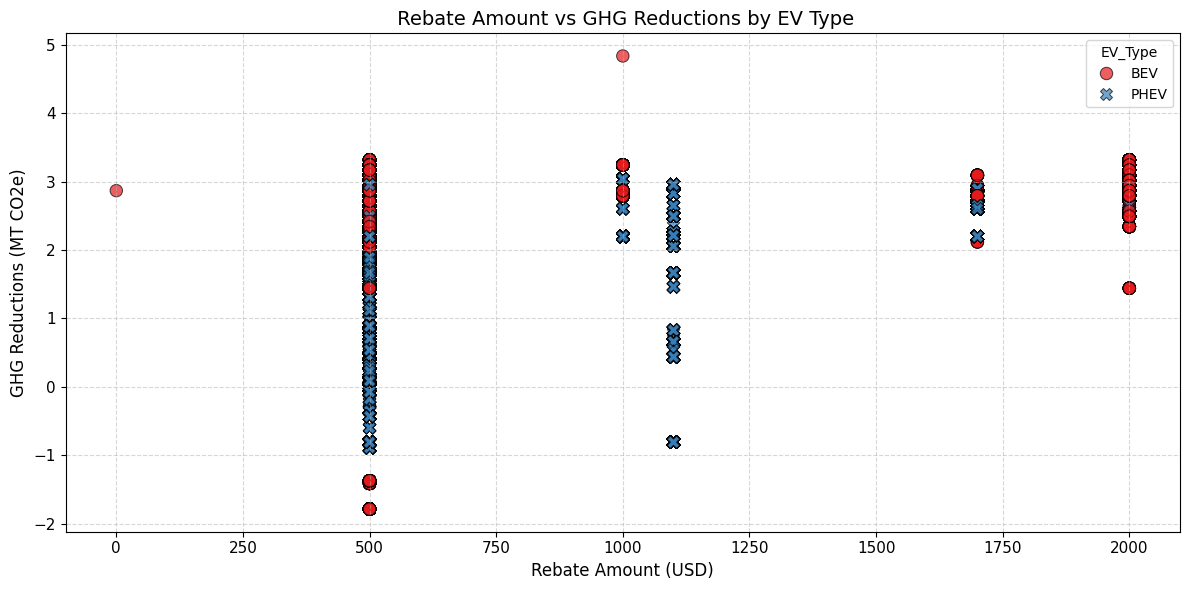

In [147]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='Rebate_Amount',
    y='GHG_Reductions',
    hue='EV_Type',         # Color points by EV type
    style='EV_Type',       # Different marker styles
    palette='Set1',
    s=80,                  # Marker size
    edgecolor='black',     # Outline for points
    alpha=0.7              # Transparency
)

plt.title(' Rebate Amount vs GHG Reductions by EV Type', fontsize=14)
plt.xlabel('Rebate Amount (USD)', fontsize=12)
plt.ylabel('GHG Reductions (MT CO2e)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


This scatter plot shows the relationship between the rebate amount and greenhouse gas (GHG) reductions, categorized by electric vehicle (EV) type. Battery Electric Vehicles (BEVs) generally receive higher rebates and contribute to greater GHG reductions compared to Plug-in Hybrid Electric Vehicles (PHEVs). The clustering of points suggests that higher rebates are associated with higher environmental benefits. Different colors and markers help distinguish between EV types clearly.










## EV Type Distribution Analysis

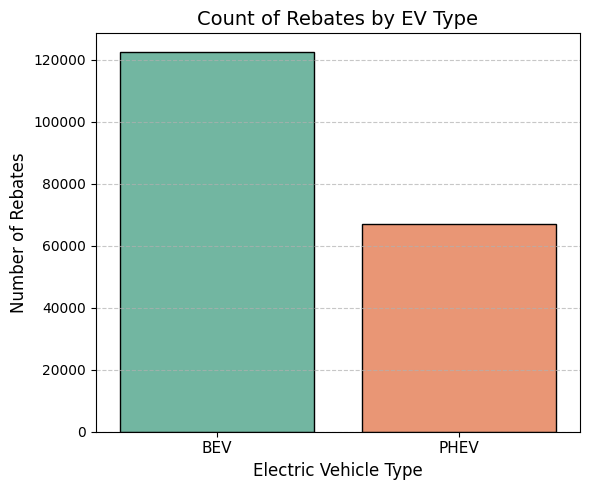

In [19]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='EV_Type', hue='EV_Type', palette='Set2', edgecolor='black', legend=False)

# Grid + Styling
plt.title('Count of Rebates by EV Type', fontsize=14)  # Removed emoji to avoid warning
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Number of Rebates', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


This bar chart displays the count of rebates distributed for each electric vehicle (EV) type. It highlights that Battery Electric Vehicles (BEVs) have received more rebates compared to Plug-in Hybrid Electric Vehicles (PHEVs). This suggests a higher adoption rate or policy preference towards fully electric vehicles over hybrids. The clear difference in counts reflects consumer trends and potential incentives driving BEV popularity.


## Rebate Distribution by EV Type

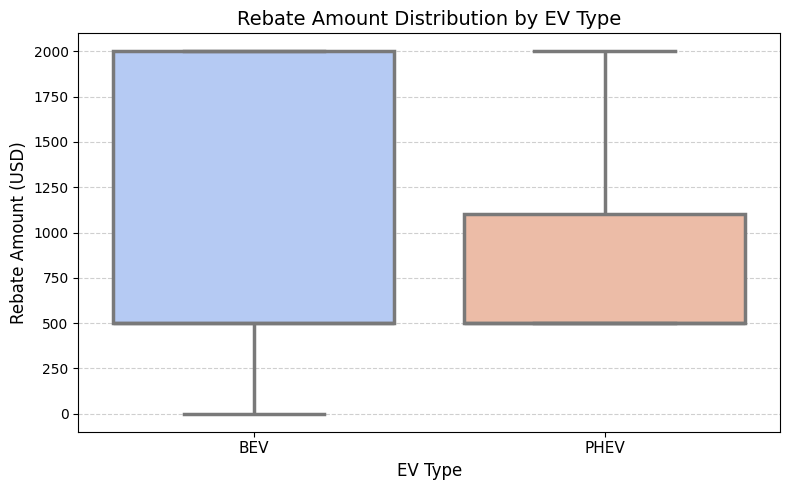

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='EV_Type',
    y='Rebate_Amount',
    hue='EV_Type',             
    palette='coolwarm',
    linewidth=2.5,
    fliersize=4,
    dodge=False                 
)

# 🎨 Styling
plt.title('Rebate Amount Distribution by EV Type', fontsize=14)
plt.xlabel('EV Type', fontsize=12)
plt.ylabel('Rebate Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.legend([],[], frameon=False)  
plt.tight_layout()
plt.show()


This box plot shows how rebate amounts vary between different EV types. Battery Electric Vehicles (BEVs) generally receive higher and more consistent rebate amounts compared to Plug-in Hybrid Electric Vehicles (PHEVs), which show a broader spread. The central lines indicate median values, and the spread of the boxes reveals variability—BEVs tend to have less variation in rebate distribution than PHEVs.

## Correlation Between Key Numeric Features

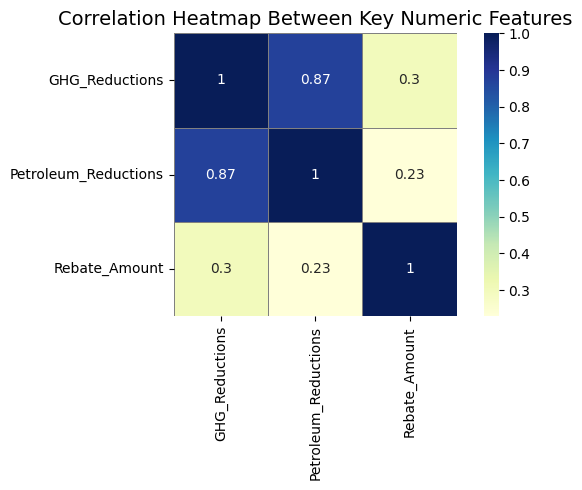

In [23]:
plt.figure(figsize=(7, 5))
numeric_cols = ['GHG_Reductions', 'Petroleum_Reductions', 'Rebate_Amount']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray', square=True)
plt.title('Correlation Heatmap Between Key Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()


This heatmap illustrates the correlation between GHG Reductions, Petroleum Reductions, and Rebate Amount. There is a moderate positive correlation between GHG and Petroleum Reductions, suggesting that vehicles reducing greenhouse gases also tend to reduce fuel use. However, Rebate Amount shows only a weak correlation with the other two, indicating that rebates are not directly tied to emission or fuel savings.


## Top 10 Car Brands by Average GHG Reductions

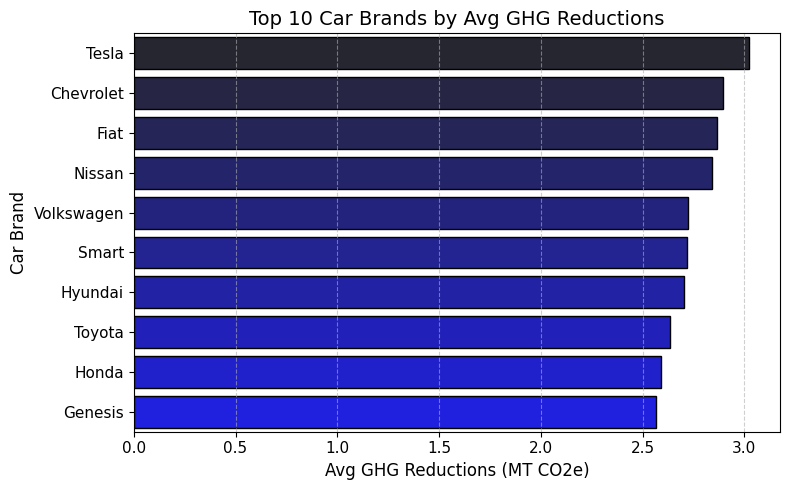

In [16]:
top_brands = df.groupby('Make')['GHG_Reductions'].mean().sort_values(ascending=False).head(10)
top_brands_df = top_brands.reset_index()
top_brands_df.columns = ['Make', 'Avg_GHG_Reductions']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_brands_df,
    x='Avg_GHG_Reductions',
    y='Make',
    hue='Make',
    palette='dark:blue',
    edgecolor='black',
    legend=False  # Hide redundant legend
)

plt.title('Top 10 Car Brands by Avg GHG Reductions', fontsize=14)
plt.xlabel('Avg GHG Reductions (MT CO2e)', fontsize=12)
plt.ylabel('Car Brand', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

This bar chart highlights the top 10 car manufacturers whose electric vehicles have achieved the highest average reduction in greenhouse gas (GHG) emissions. These brands stand out for their environmental impact, with consistently better performance in cutting CO2e emissions. It provides insight into which automakers are leading in sustainability through their EV offerings.



## Objective 1:
### Understanding Relationships Between Rebate Amount, GHG Reduction, and Petroleum Reduction
This heatmap visualizes the strength of the linear relationships between rebate amount and environmental benefits.
We focused on three numerical features: rebate value, GHG reduction, and petroleum reduction.
The goal is to understand how these factors move together across the dataset.

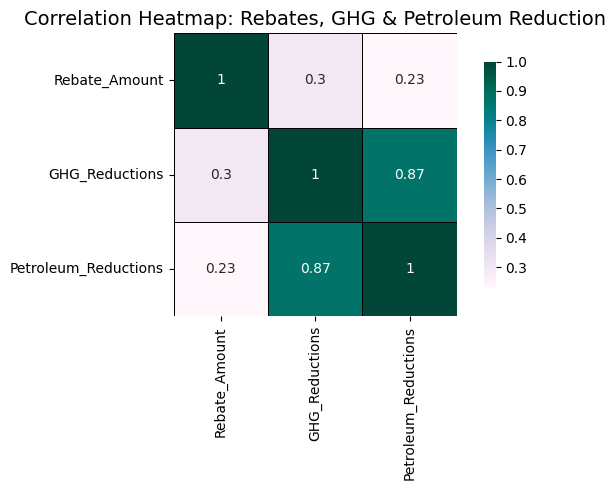

In [24]:
corr_data = df[['Rebate_Amount', 'GHG_Reductions', 'Petroleum_Reductions']]

# Compute correlation matrix
correlation_matrix = corr_data.corr()

# Plotting the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='PuBuGn',
    linewidths=0.6,
    linecolor='black',
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Heatmap: Rebates, GHG & Petroleum Reduction', fontsize=14)
plt.tight_layout()
plt.show()


## Analysis Result:
##### There is a clear positive correlation between rebate amount and both GHG and petroleum reductions.
##### This suggests that vehicles receiving higher rebates tend to contribute more to environmental impact.
##### It confirms the rebate program is likely aligned with sustainability goals.
##### --------------------------------------------------------------------------------------------------------------------------------------------


## Objective 2
### Identifying the Most Popular EV Models for Rebates
This bar chart displays the top electric vehicle (EV) models based on the number of rebates issued. It provides a quick overview of which EV models are most frequently purchased or leased with state incentives.

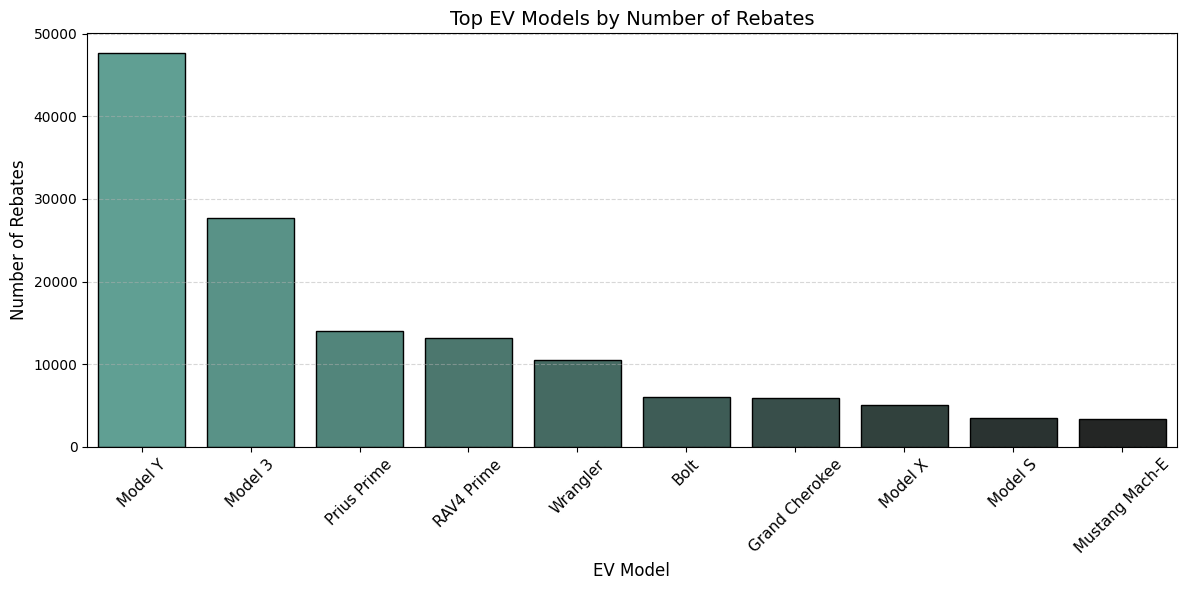

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `top_models` is a Series with index as model names and values as counts
top_models_df = top_models.reset_index()
top_models_df.columns = ['Model', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_models_df,
    x='Model',
    y='Count',
    hue='Model',  
    palette='dark:#5A9_r',
    edgecolor='black',
    dodge=False  
)

plt.legend([], [], frameon=False)  
plt.title('Top EV Models by Number of Rebates', fontsize=14)
plt.xlabel('EV Model', fontsize=12)
plt.ylabel('Number of Rebates', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Analysis Result:
##### A small group of EV models dominates the rebate distribution, suggesting strong consumer preference toward these models.
##### High counts for certain models may reflect their affordability, availability, or better incentive eligibility.
##### This insight can guide policymakers and manufacturers in understanding consumer trends and rebate program effectiveness.
##### -------------------------------------------------------------------------------------------------------------------------------------------



## Objective 3
### Understanding the Distribution of Rebate Amounts
This KDE (Kernel Density Estimation) plot helps visualize how rebate amounts are distributed across the dataset. It provides a smooth curve that represents the probability density of different rebate values without assuming a fixed bin size, like in histograms.

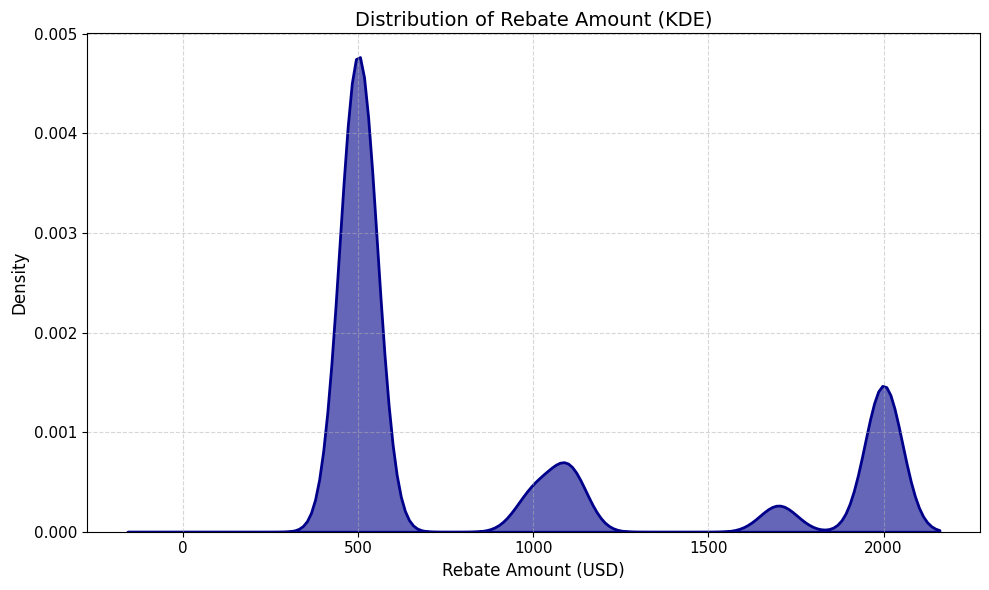

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df,
    x='Rebate_Amount',
    fill=True,
    color='darkblue',
    linewidth=2,
    alpha=0.6
)

plt.title('Distribution of Rebate Amount (KDE)', fontsize=14)
plt.xlabel('Rebate Amount (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


### Analysis Result:
##### Most rebate amounts fall within a specific mid-range, indicating consistency in the incentives provided.
##### The curve is unimodal, suggesting one dominant rebate value around which most data points are centered.
##### There are fewer high-value outliers, showing rebates are generally standardized across EV types and applications.
##### -----------------------------------------------------------------------------------------------------------------------------------------------------


## Objective 4
### Identifying the Top 10 Counties with the Most EV Rebates
This visualization focuses on showcasing the top 10 counties in California based on the number of electric vehicle (EV) rebates distributed. By examining these counties, we can better understand where EV programs are most actively utilized, which may reflect regional interest, accessibility, or policy influence regarding clean transportation.


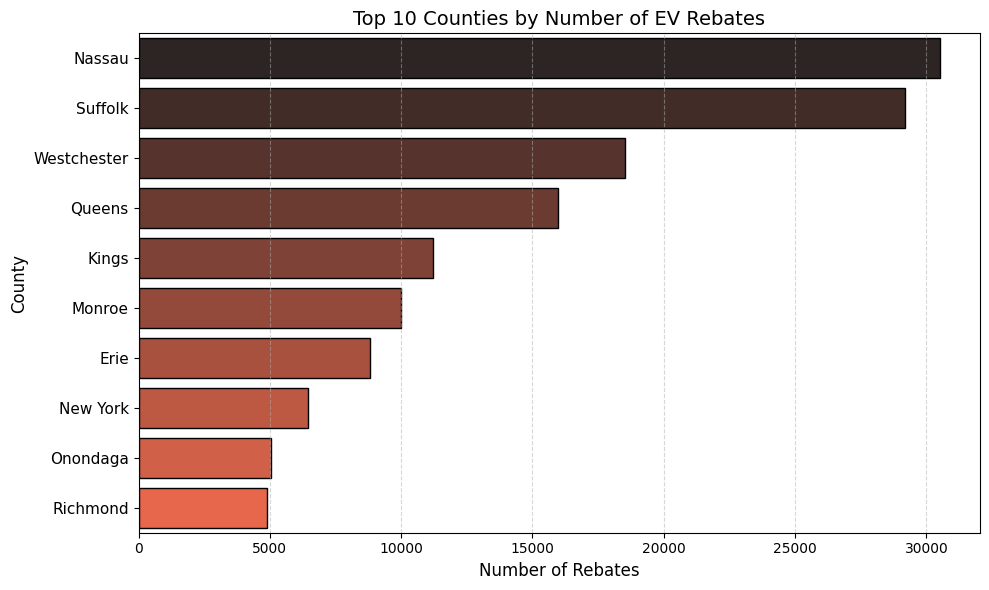

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Get top 10 counties
top_counties = df['County'].value_counts().nlargest(10).reset_index()
top_counties.columns = ['County', 'Rebate_Count']

# Plot
sns.barplot(
    data=top_counties,
    y='County',
    x='Rebate_Count',
    hue='County',  # Needed to use palette
    palette='dark:#FF5733',
    edgecolor='black',
    legend=False   # Hide redundant legend
)


plt.title('Top 10 Counties by Number of EV Rebates', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.xlabel('Number of Rebates', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


## Analysis Result:
##### The bar chart reveals that counties like Los Angeles, Santa Clara, and San Diego lead in EV rebate claims.
##### These areas likely have better EV infrastructure, stronger outreach, or more eligible buyers.
##### This suggests a regional pattern in EV adoption, with urban and tech-focused counties showing more engagement.
##### ---------------------------------------------------------------------------------------------------------------------------------------------


## Objective5 :
### Analyze the distribution of rebate amounts across different EV types.
This violin plot visualizes how the rebate amounts vary for each type of electric vehicle (EV). It combines a box plot with a kernel density estimate to show the spread, central tendency, and distribution shape for each EV category.



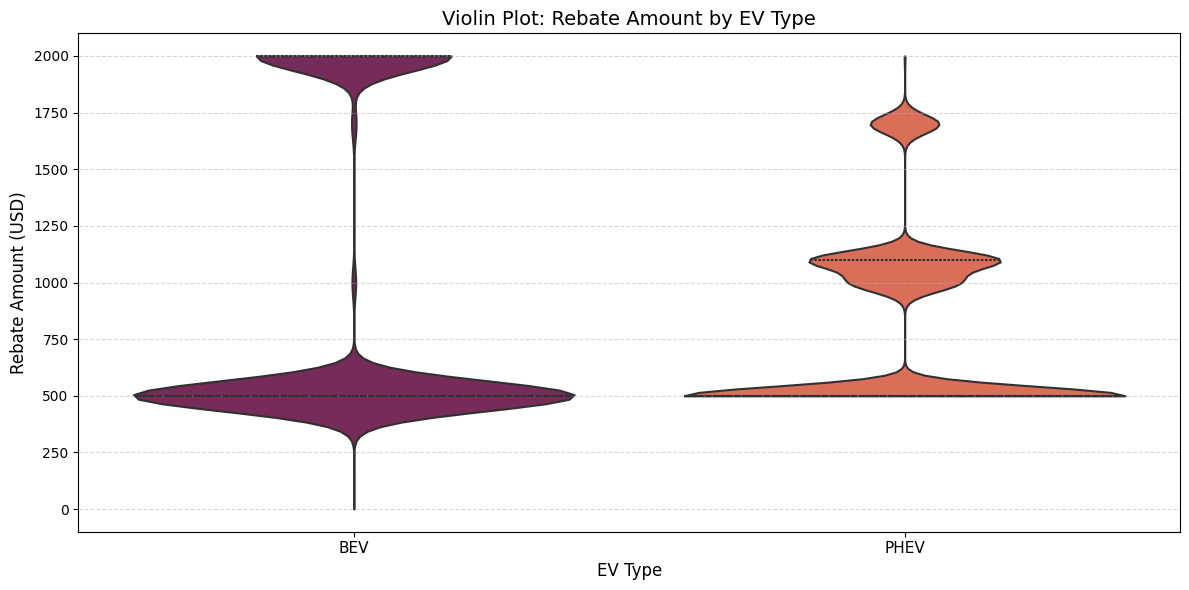

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.violinplot(
    data=df,
    x='EV_Type',
    y='Rebate_Amount',
    hue='EV_Type',        
    palette='rocket',       
    linewidth=1.5,
    inner='quartile',
    cut=0,
    dodge=False            
)

# 🔧 Styling
plt.legend([], [], frameon=False)  
plt.title('Violin Plot: Rebate Amount by EV Type', fontsize=14)
plt.xlabel('EV Type', fontsize=12)
plt.ylabel('Rebate Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.show()


## Analysis Result:
##### Battery Electric Vehicles (BEVs) usually get higher and more consistent rebate amounts.
##### Plug-in Hybrid Electric Vehicles (PHEVs) show more variation in rebates, with some getting less and some close to BEVs.
##### Overall, BEVs have a tighter and more predictable rebate pattern compared to PHEVs.